In [1]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import pandas as pd


DATADIR = 'datta'
CATEGORIES = ['0', '1','2','3','4']
labelFile = 'labels.csv' # file with all names of classes




IMG_SIZE = 64
def create_training_data():
    training_data = []
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category) 
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=C 1=O
        for img in tqdm(os.listdir(path)):  # iterate over each image
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                # resize to normalize data size
                new_array  = cv2.cvtColor(new_array, cv2.COLOR_BGR2GRAY)
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
              
    return training_data

data=pd.read_csv(labelFile)
print("data shape ",data.shape,type(data))


training_data = create_training_data()


import random

print(len(training_data))
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])


X = []
Y = []

for features,label in training_data:
    X.append(features)
    Y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X = X/255.0
X.shape[1:]

y=np.array(Y)



  0%|          | 1/200 [00:00<00:23,  8.58it/s]

data shape  (5, 2) <class 'pandas.core.frame.DataFrame'>


100%|██████████| 177/177 [00:00<00:00, 271.72it/s]

919
3
0
3
3
2
4
4
3
3
4


In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, AveragePooling2D
model = Sequential()


model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=X.shape[1:]))
model.add(AveragePooling2D())
model.add(Dropout(0.5))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=128, activation='relu'))

model.add(Dense(units=5, activation = 'softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])




history = model.fit(X, y, batch_size=32, epochs=50,validation_split=0.3)
model.save('traffic_model.h5')


Epoch 1/50
21/21 [==============================] - 5s 227ms/step - loss: 1.5815 - accuracy: 0.2442 - val_loss: 1.5217 - val_accuracy: 0.3188
Epoch 2/50
21/21 [==============================] - 4s 181ms/step - loss: 1.3447 - accuracy: 0.3966 - val_loss: 1.1518 - val_accuracy: 0.5906
Epoch 3/50
21/21 [==============================] - 4s 203ms/step - loss: 1.0183 - accuracy: 0.5521 - val_loss: 0.8730 - val_accuracy: 0.5906
Epoch 4/50
21/21 [==============================] - 4s 201ms/step - loss: 0.8257 - accuracy: 0.6159 - val_loss: 0.9209 - val_accuracy: 0.5543
Epoch 5/50
21/21 [==============================] - 5s 225ms/step - loss: 0.7191 - accuracy: 0.6485 - val_loss: 0.6232 - val_accuracy: 0.6957
Epoch 6/50
21/21 [==============================] - 5s 225ms/step - loss: 0.5945 - accuracy: 0.7325 - val_loss: 0.6818 - val_accuracy: 0.6630
Epoch 7/50
21/21 [==============================] - 5s 236ms/step - loss: 0.5888 - accuracy: 0.7216 - val_loss: 0.5491 - val_accuracy: 0.7681
Epoch 

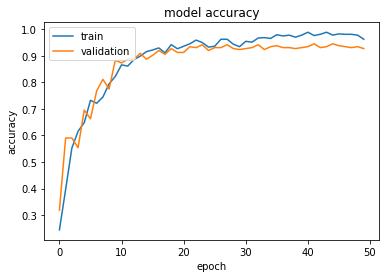

In [4]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

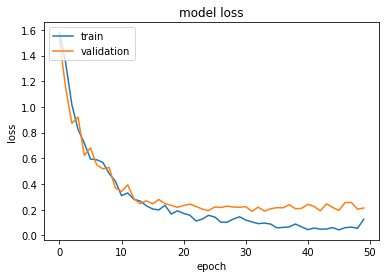

In [5]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()